# 面向公司的机器学习入门讲义

## [0x01] 环境准备
- python 3.6+
- jupyterlab 2.1.2
- matplotlib 3.2.1
- tensorflow 2.2.0
- sklearn 0.23.1

## [0x02] 环境启动方法
```sh
jupyter notebook --no-browser --port=8086 --ip=<YOUR IP>
```

## [1x01] 当我们说AI时，我们是在谈论什么？

一张鸟瞰图，找准我们的位置
![00001](asset/00001.png)

- <b>人工智能</b>  非常宽泛的领域，通常不能准确的表述所要讨论的问题
- <b>机器学习</b>  泛指传统机器学习，特点：
    - 不包含神经网络
    - 提出时间相对较早
    - 代表性算法：支持向量机(SVM) / 决策树等
- <b>深度学习</b>  针包含神经网络构成的机器学习算法的总称。特点：
    - <span style='color:red;'>由神经网络构成</span>
    - 随着算力的不断加强，可训练的层数比较深

## [1x02] 什么是机器学习算法

### 什么是 ~传统~ 算法?

算法是利用计算机解决问题的处理步骤，简而言之，<b>算法就是解决问题的步骤</b>。

算法不仅仅用于计算机的数据处理，现实世界中的各种问题也需要结合算法的概念来解决，其中，具有代表性的就是烹饪中用到的食谱，食谱是各种美味料理的制作方法，需要用一定的步骤表示出来。

![00003](asset/00003.jpg)

多说无益，上干货。

想想以下我们要烹饪一道美食：
- 材料
- 菜谱
- 工具

已经全部就为

![00002](asset/00002.jpg)

分析之下，我们会精心设计一个可控的流程，环环相扣，从输入开始一步一步得到结果。

![00004](asset/00004.jpg)

这是我们正常处理事情的方法，也是学校里老师所教授的。

敲黑板复习一下：
- 排序算法
- 树
  - 二叉
  - 红黑 ~面试树~
  - 深度优先
  - 广度优先
- 图
- 动态规划

![00005](asset/00005.jpg)

机器学习算法完全不是这个套路。

### 机器学习算法

机器学习算法与传统算法最大的不同点在于：**机器学习算法是根据数据反推规则**

想一想人类是如何学习新事物的？
- 读书
- 思考
- 技能

机器学习仿照人的学习方式来工作：
- 输入数据
- 挖掘关系、总结规律
- 输出模型

![00006](asset/00006.jpg)

装X版
![00007](asset/00007.jpg)

### 机器学习 VS 深度学习

机器学习与深度学习最大的区别在于，深度学习依靠**神经网络**作为模型的载体。

神经网络长什么样子？
![00009](asset/00009.jpg)

![00010](asset/00010.jpg)

很酷是吧？

下面看一下几个颠覆性的结论：
- 无法预判最终会得到什么样的模型
- 同样的数据，同样的算法，还是会得到不同的模型
  - 这些模型有的可用，有的却完全无效
- 超参数都是百万级别起步的，无法手工调整
- 现阶段对于模型的整个训练过程，无法解释

### Demo

先来看一个机器学习的典型事例。

**鸢尾花的分类**
由Fisher在1936年整理，包含4个特征:
- Sepal.Length（花萼长度）
- Sepal.Width（花萼宽度）
- Petal.Length（花瓣长度）
- Petal.Width（花瓣宽度）

特征值都为正浮点数，单位为厘米。

目标值为鸢尾花的分类
- Iris Setosa(山鸢尾)
- Iris Versicolor(杂色鸢尾)
- Iris Virginica(维吉尼亚鸢尾)

![00008_1](asset/00008_1.jpg)
![00008_2](asset/00008_2.jpg)
![00008_3](asset/00008_3.jpg)

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
print("The iris' target names: ", iris.target_names)

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

iris.data.shape

The iris' target names:  ['setosa' 'versicolor' 'virginica']


(150, 4)

In [7]:
# 数据长什么样(前10条)
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

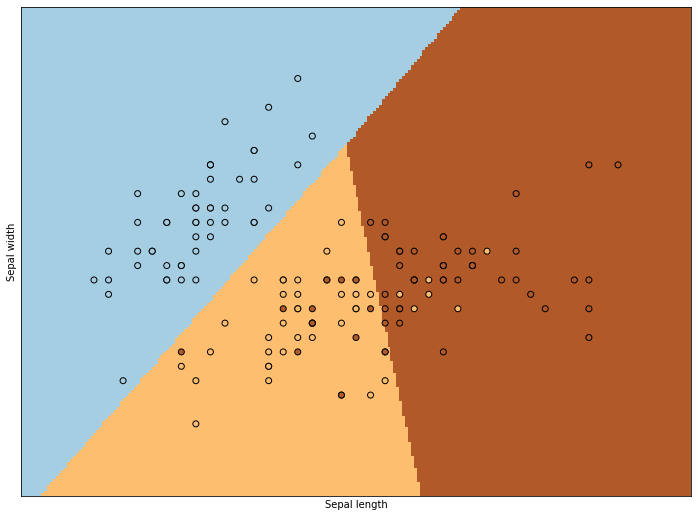

In [8]:
# 完整代码
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Demo

再来看一个使用**神经网络**的例子

**线性回归** 用一条线，来描述一种趋势
很多时候，如果把业务数据画在一张图标上，我们往往可以看出其发展的规律；

如果把这些数据“放到”一个预先定义好结构的神经网络里，那么我们就得到一个包含了这种规律的“模型”

(500, 4)
[ 1.         -1.00401606  1.00804826 -1.01209664]
Epoch 1/500
16/16 [==============================] - 0s 4ms/step - loss: 1.2749
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 1.2020
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 1.1312
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 1.0650
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 1.0016
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.9437
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8882
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8367
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7890
Epoch 10/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7439
Epoch 11/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7033
Epoch 12/500
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 102/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 103/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 104/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 105/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 106/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 107/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 108/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 109/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 110/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 111/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 112/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 113/500
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 202/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 203/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 204/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 205/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 206/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 207/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 208/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 209/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 210/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 211/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 212/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 213/500
16/16 [=========

16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 302/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 303/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 304/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 305/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 306/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 307/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 308/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 309/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 310/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 311/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 312/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 313/500
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 401/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 402/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 403/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 404/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 405/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 406/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 407/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 408/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 409/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 410/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 412/500
16/16 [=========

16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 498/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 499/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 500/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0037


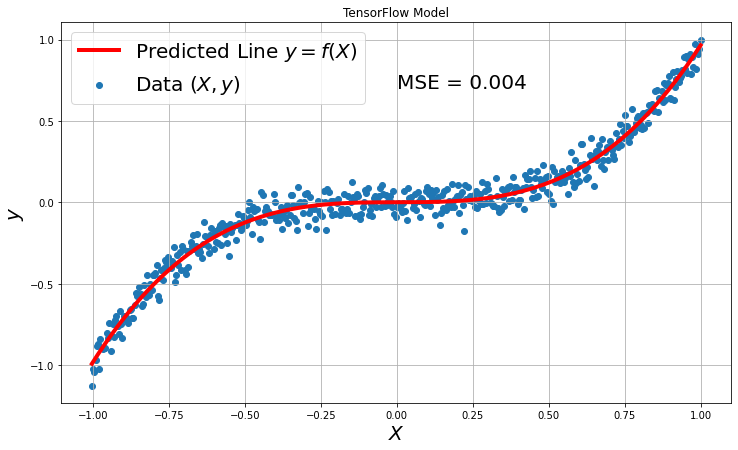

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import PolynomialFeatures

# parameter
degree_n = 3


def dataset(show=True):
    X = np.arange(-25, 25, 0.1)
    # Try changing y to a different function
    y = X**3 + 20 + np.random.randn(500)*1000
    if show:
        plt.scatter(X, y)
        plt.show()
    return X, y


def create_model():
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[degree_n+1])])
    # you can also define optimizers in this way, so you can change parameters like lr.
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model


def create_polynomial_features(x, n):
    poly = PolynomialFeatures(degree=n)
    _x_n = poly.fit_transform(x.reshape(-1, 1))
    print(_x_n.shape)
    print(_x_n[0])
    return _x_n


X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)

X_2 = create_polynomial_features(X_scaled, degree_n)


model = create_model()

tf_history = model.fit(X_2, y_scaled, epochs=500, verbose=True)


# plt.plot(tf_history.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('MSE Loss')
# plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_2)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_2[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_2[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

这一根红色的曲线，就是神经网络，通过输入的数据所“找到”的“规律”。

**总结**一下，对于一个神经网络：
- 投喂的是“数据”
- 建立的是“网络”
- 产出的是“模型”（规律）

![00011](asset/00011.jpg)

## [Nx01] 如何从入门到放弃

最后来看一看如何从入门到 ~专家~ 放弃

也许你眼中的机器学习工程师是这样的
![00012](asset/00012.jpg)

情况大体不差，通过上面的代码来看，使用其实不是太难，概念也可以理解。

但如果往深处探索，那就道路就比较曲折了，不妨从下面这本书入手
![00013](asset/00013.jpg)

总结
- 入门和应用不可怕
- 深度研究要有强悍的数学作为基本功

![00014](asset/00014.jpg)